### Stock Trading Strategy - Alphabet Inc. (GOOG)

*Project goal*: to assess variations in the stock prices of Alphabet Inc. (GOOG) over the past 10 years by employing fast and slow stochastic technique. 

*Tools and modules used*:
- Python
- yfinance
- Pandas
- Matplotlib
- Jupyter Notebook

*Data (source)*: Yahoo! Finance

*Key words*: moving average, fast signal, slow signal, daily return, wealth accumulation.

### Data Visualization and Data Munging

In [1]:
# Import necessary modules
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set the ticker symbol
goog_symbol = 'GOOG'

# Load the stock data
goog_data = yf.Ticker(goog_symbol)

# Get the historical prices of the stock
goog_ = goog_data.history(period='1d', start='2010-01-01', end='2020-09-20')

In [3]:
# Print size of the data
goog_obs, goog_var = goog_.shape
print(f'Number of observations: {goog_obs}, number of features: {goog_var}')

Number of observations: 2698, number of features: 7


In [4]:
# Display a cross-section of the data
goog_.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,311.21,311.53,308.83,308.83,2448700,0,0.0
2010-01-04,312.30,313.58,310.95,312.20,3927000,0,0.0
2010-01-05,312.42,312.75,309.61,310.83,6031900,0,0.0
2010-01-06,311.76,311.76,302.05,302.99,7987100,0,0.0
2010-01-07,303.56,303.86,295.22,295.94,12876600,0,0.0


Open: price at which a stock began trading in a given time period

Close: price at which a stock ended trading in a given time period.

High: maximum price in a given time period.

Low: minimum prices in a given time period.

Volume: total amount of trading activity (or shares traded).

In [5]:
# Drop the variables 'Dividends' and 'Stock Splits'
goog = goog_.copy()
goog.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [6]:
# Check for missing values per feature
goog.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
# Display summary statistics 
goog.describe()

,Open,High,Low,Close,Volume
count,2698.000000,2698.000000,2698.00000,2698.000000,2.698000e+03
mean,695.016694,701.322135,688.60543,695.194303,3.211549e+06
std,369.618764,373.718806,365.99396,370.104632,2.669238e+06
min,218.340000,220.310000,216.01000,217.220000,7.900000e+03
25%,332.882500,336.105000,330.73500,333.395000,1.430350e+06
50%,585.115000,587.975000,579.95500,584.110000,2.214750e+06
75%,1033.990000,1044.052500,1020.99250,1032.507500,4.297050e+06
max,1709.710000,1733.180000,1666.33000,1728.280000,2.976060e+07


The price at which a stock ended trading is considered the standard measure for a stock's value as of a specific date. Hence, interesting insights in relation to a stock's performance can be drawn by observing the close price over both short-term and long-term time frames. 

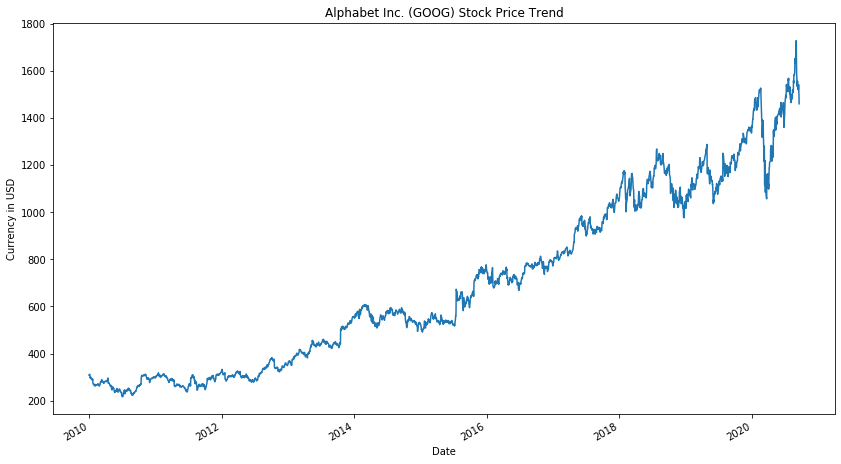

In [8]:
# Plot the close price of Alphabet over the years under analysis
plt.figure(figsize=(14,8))
goog['Close'].plot()
plt.title('Alphabet Inc. (GOOG) Stock Price Trend')
plt.ylabel('Currency in USD')
plt.show()

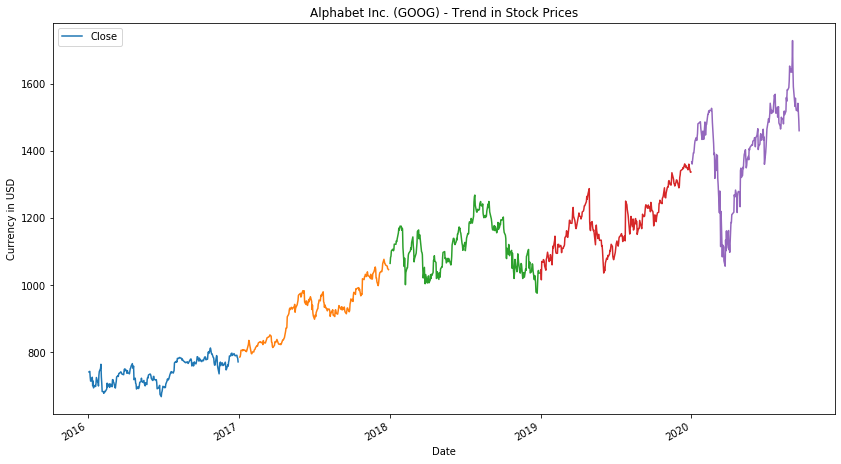

In [9]:
# Plot the close price of Alphabet highliting the trend in the past 5 years
plt.figure(figsize = (14, 8))
goog.loc['2016-01-01':'2016-12-31', 'Close'].plot(legend=True)
plt.plot(goog.loc['2017-01-01':'2017-12-31', 'Close'])
plt.plot(goog.loc['2018-01-01':'2018-12-31', 'Close'])
plt.plot(goog.loc['2019-01-01':'2019-12-31', 'Close'])
plt.plot(goog.loc['2020-01-01':'2020-12-31', 'Close'])
plt.title('Alphabet Inc. (GOOG) - Trend in Stock Prices')
plt.ylabel('Currency in USD')
plt.show()

Based on the graphs displayed above, we see that Alphabet Inc.'s stock has, for the most part, been on a yearly uptrend with a series of lower/higher highs as well as lower/higher lows. 

### Defining The Trading Strategy

The Moving Average is a widely used signal in stock trading which captures the average price of a stock over a defined number of days. It is thought to be a good indicator for identifying the trend direction of a stock.

In this particular exercise we will define two moving averages. A 10-day moving average(or fast signal) that follows prices more closely and a 100-day moving average (or slow signal) that takes on a longer term view.    

Some industry traders believe that if fast signal is greater than slow signal the share price is likely to go up in the next several days.   

#### Our trade strategy can be summarized as folows: 

*If fast signal is greater than slow signal we will long or buy one share, otherwise we will hold it.*

In [10]:
# Generate new variables: MA10, MA100
goog['MA10'] = goog['Close'].rolling(10).mean()     # fast signal
goog['MA100'] = goog['Close'].rolling(100).mean()   # slow signal
goog = goog.dropna()
goog.head()

,Open,High,Low,Close,Volume,MA10,MA100
Date,,,,,,,
2010-05-25,233.20,237.83,231.14,237.64,6057300,245.373,273.3427
2010-05-26,240.13,243.97,236.61,236.85,6977200,243.883,272.6229
2010-05-27,241.57,245.24,239.63,244.31,5639200,242.865,271.9440
2010-05-28,245.45,245.80,240.60,241.91,5811200,241.774,271.2548
2010-06-01,239.32,244.61,239.16,240.28,5353500,240.498,270.6277


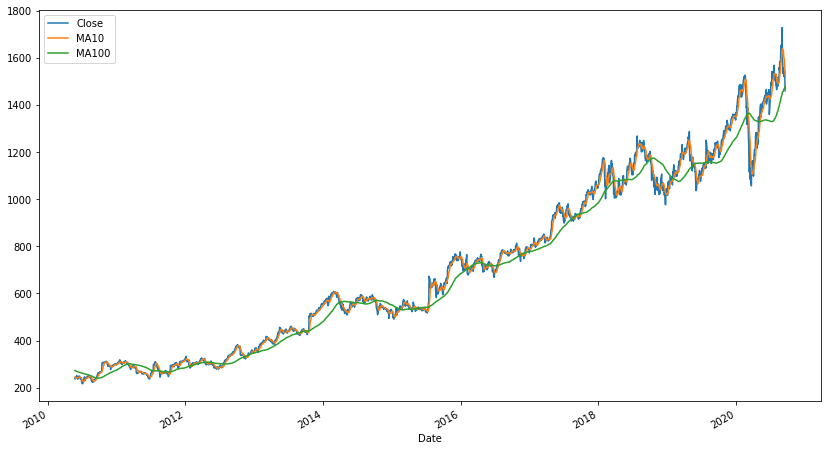

In [11]:
# Plot moving averages
plt.figure(figsize = (14, 8))
goog['Close'].plot(legend=True)
goog['MA10'].plot(legend=True)  #fast sginal 
goog['MA100'].plot(legend=True) #slow signal

#### Do we long or not?

In [12]:
# Create a variable: shares
goog['Shares'] = [1 if goog.loc[ei, 'MA10'] > goog.loc[ei, 'MA100'] else 0 for ei in goog.index]
goog.tail()

,Open,High,Low,Close,Volume,MA10,MA100,Shares
Date,,,,,,,,
2020-09-14,1539.01,1564.00,1515.74,1519.28,1696600,1591.742,1469.0732,1
2020-09-15,1536.00,1559.57,1531.83,1541.44,1331100,1582.468,1471.7245,1
2020-09-16,1555.54,1562.00,1519.82,1520.90,1311700,1568.487,1474.1404,1
2020-09-17,1496.00,1508.30,1470.00,1495.53,1879800,1545.212,1476.3369,1
2020-09-18,1498.01,1503.00,1437.13,1459.99,3101800,1527.027,1478.6001,1


In [13]:
# Compute Daily profit 
goog['Close1'] = goog['Close'].shift(-1)      # tomorrow's price
goog['Profit'] = [goog.loc[ei, 'Close1'] - goog.loc[ei, 'Close']
                if goog.loc[ei, 'Shares'] == 1
                else 0 for ei in goog.index]

Text(0.5, 1.0, 'Daily Profit vs. Loss')

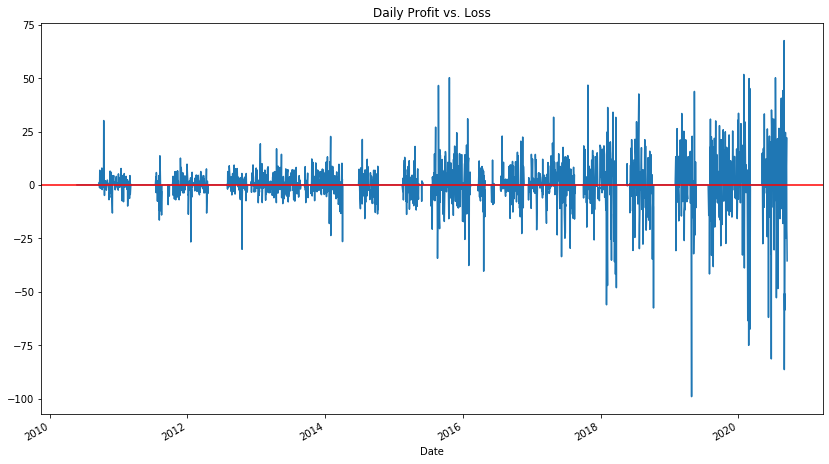

In [14]:
# Plot the profit
plt.figure(figsize = (14, 8))
goog['Profit'].plot()
plt.axhline(y=0, color='red')
plt.title('Daily Profit vs. Loss')

Below the y = 0 line we lose money and above it we make money. 

#### Evaluating Model Performance 

In [15]:
# Compute the accumulated wealth over the specified period 
goog['Wealth'] = goog['Profit'].cumsum()     # using the .cumsum() method to display 
goog.tail() # to look at the last value and check whether we make money or lose money

,Open,High,Low,Close,Volume,MA10,MA100,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,
2020-09-14,1539.01,1564.00,1515.74,1519.28,1696600,1591.742,1469.0732,1,1541.44,22.16,347.25
2020-09-15,1536.00,1559.57,1531.83,1541.44,1331100,1582.468,1471.7245,1,1520.90,-20.54,326.71
2020-09-16,1555.54,1562.00,1519.82,1520.90,1311700,1568.487,1474.1404,1,1495.53,-25.37,301.34
2020-09-17,1496.00,1508.30,1470.00,1495.53,1879800,1545.212,1476.3369,1,1459.99,-35.54,265.80
2020-09-18,1498.01,1503.00,1437.13,1459.99,3101800,1527.027,1478.6001,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Cumulative Wealth: 265.8000000000002')

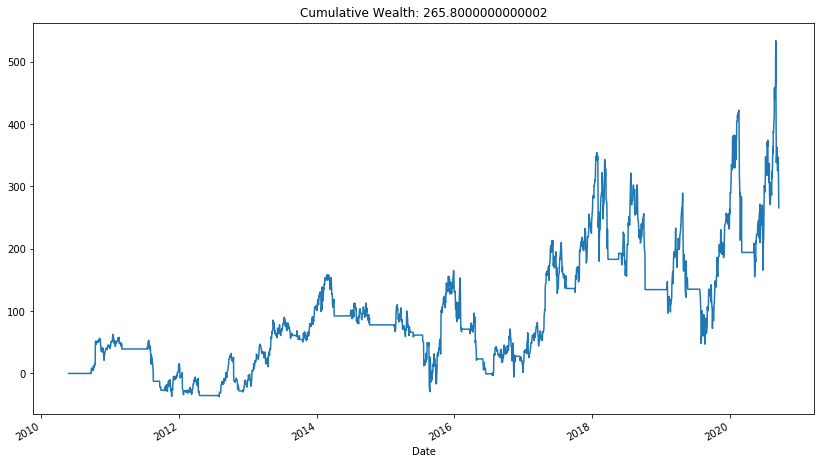

In [16]:
# Profit growth over time
plt.figure(figsize = (14, 8))
goog['Wealth'].plot()
plt.title('Cumulative Wealth: {}'.format(goog.loc[goog.index[-2], 'Wealth']))

We see that some days we make money and others we lose money. 

In [17]:
# Cumulative wealth
print('Total money won:', goog.loc[goog.index[-2], 'Wealth'])
print('Initial investment (price of stock on the first day):', goog.loc[goog.index[0], 'Close'])

Total money won: 265.8000000000002
Initial investment (price of stock on the first day): 237.64
